In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import time
import pandas as pd

In [3]:
https://www.flipkart.com/search?q=bluetooth&sid=0pm%2Cfcn&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_2_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_2_na_na_na&as-pos=1&as-type=RECENT&suggestionId=bluetooth%7CHeadset&requestId=d81e7ea1-fcd3-4420-a34a-d7517b0e1c50&as-searchtext=blu

SyntaxError: invalid decimal literal (2003119570.py, line 1)

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import time

# Initialize lists
bluetooth_names, prices, discounts, ratings, reviews = [], [], [], [], []

# Set up Selenium
options = Options()
options.add_argument("--disable-gpu")
options.add_argument("--headless")  # optional: run headless
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# Base URL (pagination handled by page parameter)
base_url = "https://www.flipkart.com/search?q=bluetooth&sid=0pm%2Cfcn&as=on&as-show=on&page="

# Number of pages you want to scrape
num_pages = 10

try:
    for page in range(1, num_pages + 1):
        print(f"Scraping page {page}...")
        driver.get(base_url + str(page))
        time.sleep(5)

        soup = BeautifulSoup(driver.page_source, 'html.parser')
        items = soup.find_all('div', class_='cPHDOP col-12-12')

        for item in items:
            # Bluetooth Name
            name_tag = item.find('a', class_='wjcEIp')
            bluetooth_names.append(name_tag['title'] if name_tag and 'title' in name_tag.attrs else "NA")

            # Price
            price_tag = item.find('div', class_='Nx9bqj')
            prices.append(price_tag.get_text(strip=True) if price_tag else "NA")

            # Discount
            discount_tag = item.find('div', class_='UkUFwK')
            discounts.append(discount_tag.get_text(strip=True) if discount_tag else "NA")

            # Rating
            rating_tag = item.find('div', class_='XQDdHH')
            ratings.append(rating_tag.get_text(strip=True) if rating_tag else "NA")

            # Reviews
            review_tag = item.find('span', class_='Wphh3N')
            reviews.append(review_tag.get_text(strip=True) if review_tag else "NA")

finally:
    driver.quit()

# Create DataFrame
df = pd.DataFrame({
    'Bluetooth_Name': bluetooth_names,
    'Price': prices,
    'Discount': discounts,
    'Rating': ratings,
    'Reviews': reviews,
})

print(df.head())


Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
                                      Bluetooth_Name   Price Discount Rating  \
0                                                 NA      NA       NA     NA   
1                                                 NA      NA       NA     NA   
2  Mivi 60Hrs Playtime, Spatial Audio, Hi-Res & L...  ₹1,299  78% off    4.2   
3  Aroma NB140 Ranger 50 Hours* Playtime |Perfect...    ₹469  76% off    3.7   
4  Aroma NB140 Power 50 Hours* Playtime, Dual Pai...    ₹449  77% off    3.6   

    Reviews  
0        NA  
1        NA  
2  (13,067)  
3  (21,786)  
4  (18,497)  


In [2]:
df

,Bluetooth_Name,Price,Discount,Rating,Reviews
0,NA,NA,NA,NA,NA
1,NA,NA,NA,NA,NA
2,"Mivi 60Hrs Playtime, Spatial Audio, Hi-Res & L...","₹1,299",78% off,4.2,"(13,067)"
3,Aroma NB140 Ranger 50 Hours* Playtime |Perfect...,₹469,76% off,3.7,"(21,786)"
4,"Aroma NB140 Power 50 Hours* Playtime, Dual Pai...",₹449,77% off,3.6,"(18,497)"
...,...,...,...,...,...
155,Aroma NB126 Aster V5.4 Upto 50Hr Playtime* 45M...,₹469,84% off,3.9,"(6,172)"
156,NA,NA,NA,NA,NA
157,NA,NA,NA,NA,NA
158,NA,"₹9,499",36% off,4.4,NA


In [4]:
# Save as Excel or CSV
df.to_csv('flipkart_bluetooth.csv', index=False)
print("Scraping complete! Data saved to flipkart_bluetooth.csv")


Scraping complete! Data saved to flipkart_bluetooth.csv


In [ ]:
import pandas as pd

# Step 1: Load the CSV
df = pd.read_csv("flipkart_bluetooth.csv")  # Replace with the actual path to your CSV

# Step 2: Drop rows with all 'NA' or NaN values
df.dropna(how='all', inplace=True)
df = df[~((df == 'NA') | (df == 'NaN')).all(axis=1)]

# Step 3: Remove rows with 'NA' in any column
df_cleaned = df[~df.isin(['NA', 'NaN']).any(axis=1)].copy()
df_cleaned.reset_index(drop=True, inplace=True)

# Step 4: Clean and convert columns

# Convert 'Price' (e.g. ₹2,499) to float
df_cleaned['Price'] = df_cleaned['Price'].replace('[₹,]', '', regex=True).astype(float)

# Convert 'Discount' (e.g. 83% off) to float
df_cleaned['Discount'] = df_cleaned['Discount'].replace('[% off]', '', regex=True).astype(float)

# Convert 'Reviews' (e.g. (1,23,456)) to int
df_cleaned['Reviews'] = df_cleaned['Reviews'].replace('[(),]', '', regex=True)
df_cleaned['Reviews'] = df_cleaned['Reviews'].str.replace(',', '').astype(int)

# Convert 'Rating' to float
df_cleaned['Rating'] = df_cleaned['Rating'].astype(float)

# Step 5: Preview
print(df_cleaned.head())


In [6]:
import pandas as pd

# Step 1: Load the CSV
df = pd.read_csv("flipkart_bluetooth.csv")  # Replace with the actual path

# Step 2: Drop fully empty or 'NA' rows
df.dropna(how='all', inplace=True)
df = df[~((df == 'NA') | (df == 'NaN')).all(axis=1)]

# Step 3: Remove rows with any 'NA' values
df_cleaned = df[~df.isin(['NA', 'NaN']).any(axis=1)].copy()
df_cleaned.reset_index(drop=True, inplace=True)

# Step 4: Clean and convert columns

# Price: ₹ and commas
df_cleaned['Price'] = df_cleaned['Price'].replace('[₹,]', '', regex=True)
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'], errors='coerce')

# Discount: remove % and "off"
df_cleaned['Discount'] = df_cleaned['Discount'].replace('[% off]', '', regex=True)
df_cleaned['Discount'] = pd.to_numeric(df_cleaned['Discount'], errors='coerce')

# Reviews: remove () and commas
df_cleaned['Reviews'] = df_cleaned['Reviews'].replace('[(),]', '', regex=True)
df_cleaned['Reviews'] = df_cleaned['Reviews'].str.replace(',', '')
df_cleaned['Reviews'] = pd.to_numeric(df_cleaned['Reviews'], errors='coerce')

# Rating
df_cleaned['Rating'] = pd.to_numeric(df_cleaned['Rating'], errors='coerce')

# Step 5: Drop any rows with remaining NaN in numeric columns
df_cleaned.dropna(subset=['Price', 'Discount', 'Rating', 'Reviews'], inplace=True)

# Step 6: Preview cleaned dataset
print(df_cleaned.head())


                                      Bluetooth_Name  Price  Discount  Rating  \
0  Mivi 60Hrs Playtime, Spatial Audio, Hi-Res & L...   1299        78     4.2   
1  Aroma NB140 Ranger 50 Hours* Playtime |Perfect...    469        76     3.7   
2  Aroma NB140 Power 50 Hours* Playtime, Dual Pai...    449        77     3.6   
3  truke Crystal Bass earbuds with 13mm Drivers, ...    899        70     4.6   
4  Aroma NB126 Berry V5.4 Upto 60Hr Playtime* Dua...    449        85     3.9   

   Reviews  
0  13067.0  
1  21786.0  
2  18497.0  
3    489.0  
4   3894.0  


In [7]:
df.head(11)

,Bluetooth_Name,Price,Discount,Rating,Reviews
2,"Mivi 60Hrs Playtime, Spatial Audio, Hi-Res & L...","₹1,299",78% off,4.2,"(13,067)"
3,Aroma NB140 Ranger 50 Hours* Playtime |Perfect...,₹469,76% off,3.7,"(21,786)"
4,"Aroma NB140 Power 50 Hours* Playtime, Dual Pai...",₹449,77% off,3.6,"(18,497)"
5,"truke Crystal Bass earbuds with 13mm Drivers, ...",₹899,70% off,4.6,(489)
6,Aroma NB126 Berry V5.4 Upto 60Hr Playtime* Dua...,₹449,85% off,3.9,"(3,894)"
7,TECHFIRE Bullets 360 TWS Earbuds with 100 HRS ...,₹300,89% off,3.6,"(28,578)"
8,DSSB Earbuds With Premium Quality Sound Bluetooth,₹299,85% off,3.6,"(11,075)"
9,Aroma NB121 Almaty Upto 40H Playtime* Fast Cha...,₹299,80% off,3.8,"(9,417)"
10,"boAt Airdopes Alpha with 35 HRS Playback, 13mm...","₹1,099",68% off,3.9,"(5,22,581)"
11,TECHFIRE BoomBuds TWS Earbuds with Bluetooth,₹300,89% off,3.7,"(5,635)"


In [32]:
df.iloc[151:161]


,Bluetooth_Name,Price,Discount,Rating,Reviews
151,"Boult Airbass Z35 with ZEN ENC Mic, 32H Playti...",₹799,73% off,3.9,"(1,37,527)"
152,"Mivi DuoPods B1 TWS[Just Launched]Rich Bass,45...",₹799,73% off,4.3,"(6,409)"
153,TECHFIRE Bullets 271 Earbuds with 100 HRS Play...,₹300,84% off,3.7,"(8,167)"
154,"POCO Pods with 30 Hour Playback, 12mm Drivers,...","₹1,099",63% off,3.7,"(10,348)"
155,OnePlus Nord Buds 3 Bluetooth,"₹2,299",17% off,4.3,"(17,893)"
156,NA,NA,NA,NA,NA
157,NA,NA,NA,NA,NA
158,NA,"₹1,299",67% off,4.2,NA
159,NA,NA,NA,NA,NA


In [36]:
df = df.dropna()


In [37]:
df

,Bluetooth_Name,Price,Discount,Rating,Reviews
0,NA,NA,NA,NA,NA
1,NA,NA,NA,NA,NA
2,"Boult W20 with Zen ENC Mic, 40H Battery Life, ...",₹899,64% off,4.1,"(1,83,334)"
3,Aroma NB140 Matrix Upto 40Hr Playtime* Fast Ch...,₹399,83% off,3.8,"(21,233)"
4,"truke BTG1 Earbuds with Game Mode, 48H Playtim...",₹699,80% off,4,"(78,658)"
...,...,...,...,...,...
155,OnePlus Nord Buds 3 Bluetooth,"₹2,299",17% off,4.3,"(17,893)"
156,NA,NA,NA,NA,NA
157,NA,NA,NA,NA,NA
158,NA,"₹1,299",67% off,4.2,NA


In [38]:
# Remove rows where all values are 'NA' (as string)
df = df[~(df == "NA").all(axis=1)]


In [39]:
df = df.reset_index(drop=True)


In [40]:
df

,Bluetooth_Name,Price,Discount,Rating,Reviews
0,"Boult W20 with Zen ENC Mic, 40H Battery Life, ...",₹899,64% off,4.1,"(1,83,334)"
1,Aroma NB140 Matrix Upto 40Hr Playtime* Fast Ch...,₹399,83% off,3.8,"(21,233)"
2,"truke BTG1 Earbuds with Game Mode, 48H Playtim...",₹699,80% off,4,"(78,658)"
3,"truke Buds Echo 24-Bit 360 Spatial Audio, 13mm...","₹1,399",65% off,4.5,(814)
4,Aroma NB126 Berry V5.4 Upto 60Hr Playtime* Dua...,₹449,85% off,3.9,"(3,580)"
...,...,...,...,...,...
105,"Mivi DuoPods B1 TWS[Just Launched]Rich Bass,45...",₹799,73% off,4.3,"(6,409)"
106,TECHFIRE Bullets 271 Earbuds with 100 HRS Play...,₹300,84% off,3.7,"(8,167)"
107,"POCO Pods with 30 Hour Playback, 12mm Drivers,...","₹1,099",63% off,3.7,"(10,348)"
108,OnePlus Nord Buds 3 Bluetooth,"₹2,299",17% off,4.3,"(17,893)"


In [18]:
# Assuming the product name is in a column called 'Bluetooth_Name'
df['Brand'] = df['Bluetooth_Name'].apply(lambda x: x.split()[0] if isinstance(x, str) else "Unknown")


In [19]:
df

,Bluetooth_Name,Price,Discount,Rating,Reviews,Brand
0,NA,NA,NA,NA,NA,NA
1,NA,NA,NA,NA,NA,NA
2,"Mivi 60Hrs Playtime, Spatial Audio, Hi-Res & L...","₹1,299",78% off,4.2,"(13,067)",Mivi
3,Aroma NB140 Ranger 50 Hours* Playtime |Perfect...,₹469,76% off,3.7,"(21,786)",Aroma
4,"truke Airbuds Lite with Quad Mic ENC, 48Hrs Ba...",₹699,76% off,3.9,"(75,236)",truke
...,...,...,...,...,...,...
155,Aroma NB128 Ruby 24* Hours Playtime Dual Pairi...,₹288,85% off,3.8,"(9,023)",Aroma
156,NA,NA,NA,NA,NA,NA
157,NA,NA,NA,NA,NA,NA
158,NA,"₹1,699",39% off,3.6,NA,NA


In [11]:
df['Brand'] = df['Brand'].str.title()  # Capitalize each brand


In [12]:
df

,Bluetooth_Name,Price,Discount,Rating,Reviews,Brand
2,"Aroma NB120 Amaze Upto 50 Hours* Playtime, Fas...",299,90,3.7,"(41,037)",Aroma
3,Aroma NB140 Ranger 50 Hours* Playtime |Perfect...,469,76,3.7,"(21,786)",Aroma
4,"truke Airbuds Lite with Quad Mic ENC, 48Hrs Ba...",699,76,3.9,"(75,236)",Truke
5,"truke Crystal Bass earbuds with 13mm Drivers, ...",899,70,4.6,(489),Truke
6,"Aroma NB120 Amaze Upto 50 Hours* Playtime, Fas...",299,90,3.7,"(41,037)",Aroma
...,...,...,...,...,...,...
151,"Mivi (Just Launched) 45Hrs Playtime, HD Call, ...",899,70,4.3,"(6,730)",Mivi
152,"Mi Buds 5A, 25dB ANC,30hr playtime, AI-ENC cle...",1299,56,4.1,"(8,842)",Mi
153,"Noise Buds MVP102 with Dual Pairing, 60 Hours ...",999,66,3.9,"(6,282)",Noise
154,"Boult Klarity 1 with 80 Hrs Battery, Dual Pair...",1299,62,4.1,"(4,083)",Boult


In [45]:
df.to_csv(r'C:\Users\Nalin kumar\Downloads\flipkart_bluetooth.csv', index=False)


In [14]:
df

,Bluetooth_Name,Price,Discount,Rating,Reviews,Brand
2,"Aroma NB120 Amaze Upto 50 Hours* Playtime, Fas...",299,90,3.7,"(41,037)",Aroma
3,Aroma NB140 Ranger 50 Hours* Playtime |Perfect...,469,76,3.7,"(21,786)",Aroma
4,"truke Airbuds Lite with Quad Mic ENC, 48Hrs Ba...",699,76,3.9,"(75,236)",Truke
5,"truke Crystal Bass earbuds with 13mm Drivers, ...",899,70,4.6,(489),Truke
6,"Aroma NB120 Amaze Upto 50 Hours* Playtime, Fas...",299,90,3.7,"(41,037)",Aroma
...,...,...,...,...,...,...
151,"Mivi (Just Launched) 45Hrs Playtime, HD Call, ...",899,70,4.3,"(6,730)",Mivi
152,"Mi Buds 5A, 25dB ANC,30hr playtime, AI-ENC cle...",1299,56,4.1,"(8,842)",Mi
153,"Noise Buds MVP102 with Dual Pairing, 60 Hours ...",999,66,3.9,"(6,282)",Noise
154,"Boult Klarity 1 with 80 Hrs Battery, Dual Pair...",1299,62,4.1,"(4,083)",Boult


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import re

# Assuming df is already loaded or scraped
# Clean and prepare the data
df = df[df['Bluetooth_Name'] != 'NA']
df = df[df['Rating'] != 'NA']

# Price: remove ₹ and commas
df['Price'] = df['Price'].apply(lambda x: int(re.sub(r'[^\d]', '', x)))

# Discount: remove % and convert to int
df['Discount'] = df['Discount'].apply(lambda x: int(re.sub(r'[^\d]', '', x)) if x != 'NA' else 0)

# Rating to float
df['Rating'] = df['Rating'].astype(float)

# Features and target
X = df[['Price', 'Discount']]
y = df['Rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)  # You can tune this number
knn.fit(X_train, y_train)

# Predict ratings
y_pred = knn.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


In [5]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


Confusion Matrix:
 [[ 3  1]
 [ 1 15]]


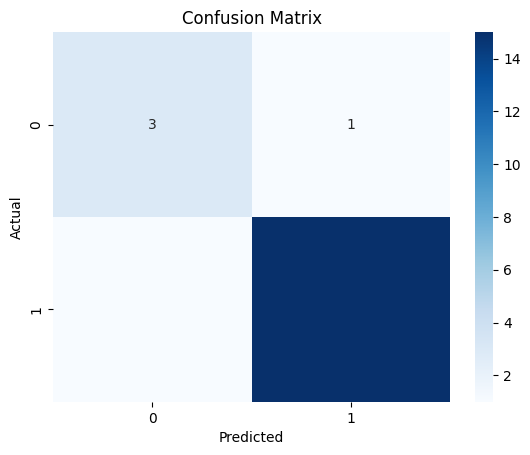

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [7]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.02675999999999999


In [8]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: 0.4880918220946917


In [20]:
# Get the distribution of numerical columns
print(df[['Price', 'Discount', 'Rating']].describe())


       Price Discount Rating
count    160      160    160
unique    38       36     12
top       NA       NA     NA
freq      50       50     50


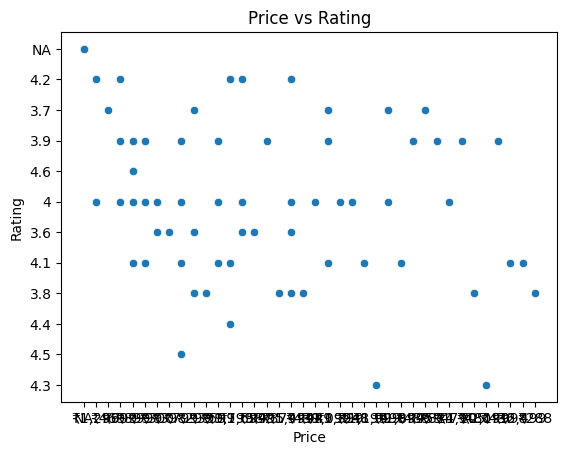

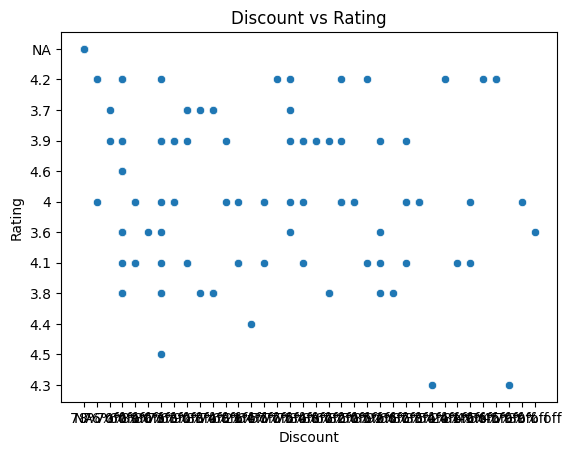

In [21]:
# Price vs Rating
sns.scatterplot(x='Price', y='Rating', data=df)
plt.title('Price vs Rating')
plt.show()

# Discount vs Rating
sns.scatterplot(x='Discount', y='Rating', data=df)
plt.title('Discount vs Rating')
plt.show()


In [26]:
import pandas as pd
import numpy as np

# Example: Load the data (replace this with your actual data loading step)
# df = pd.read_csv("your_dataset.csv")

# Replace 'NA' with NaN
df.replace('NA', np.nan, inplace=True)

# Handle missing data: Option 1 - Remove rows with NaN values
df = df.dropna(subset=['Price', 'Discount', 'Rating'])

# Option 2 - Or, fill missing values with mean (example for Price, Discount, Rating columns)
df['Price'] = df['Price'].fillna(df['Price'].mean())
df['Discount'] = df['Discount'].fillna(df['Discount'].mean())
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

# Ensure columns are numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Drop rows where any numeric conversion failed (e.g., if there were still non-numeric values)
df = df.dropna(subset=['Price', 'Discount', 'Rating'])

# Check the cleaned data
print(df.head())


                                      Bluetooth_Name  Price  Discount  Rating  \
2  Mivi 60Hrs Playtime, Spatial Audio, Hi-Res & L...   1299        78     4.2   
3  Aroma NB140 Ranger 50 Hours* Playtime |Perfect...    469        76     3.7   
4  truke Airbuds Lite with Quad Mic ENC, 48Hrs Ba...    699        76     3.9   
5  truke Crystal Bass earbuds with 13mm Drivers, ...    899        70     4.6   
6  truke BTG 500 with 40mm Drivers, 10H of Playti...    999        60     4.0   

    Reviews  Brand  
2  (13,067)   Mivi  
3  (21,786)  Aroma  
4  (75,236)  truke  
5     (489)  truke  
6   (1,846)  truke  


In [25]:
import pandas as pd
import numpy as np
import re

# Load your data
# df = pd.read_csv("your_dataset.csv")

# Clean the 'Price' column (remove ₹ and commas)
df['Price'] = df['Price'].apply(lambda x: re.sub(r'[^\d]', '', str(x)))  # Remove ₹ and commas
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')  # Convert to numeric, invalid parsing will return NaN

# Clean the 'Discount' column if needed
df['Discount'] = df['Discount'].apply(lambda x: re.sub(r'[^\d]', '', str(x)))  # Remove non-numeric characters
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')  # Convert to numeric

# Handle NaN values (e.g., fill with the mean or drop)
df['Price'] = df['Price'].fillna(df['Price'].mean())
df['Discount'] = df['Discount'].fillna(df['Discount'].mean())

# If you want to remove rows with NaN in any critical column:
# df = df.dropna(subset=['Price', 'Discount', 'Rating'])

# Ensure 'Rating' is numeric as well
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())  # Handle missing ratings if any

# Check the cleaned dataframe
print(df.head())


                                      Bluetooth_Name  Price  Discount  Rating  \
2  Mivi 60Hrs Playtime, Spatial Audio, Hi-Res & L...   1299        78     4.2   
3  Aroma NB140 Ranger 50 Hours* Playtime |Perfect...    469        76     3.7   
4  truke Airbuds Lite with Quad Mic ENC, 48Hrs Ba...    699        76     3.9   
5  truke Crystal Bass earbuds with 13mm Drivers, ...    899        70     4.6   
6  truke BTG 500 with 40mm Drivers, 10H of Playti...    999        60     4.0   

    Reviews  Brand  
2  (13,067)   Mivi  
3  (21,786)  Aroma  
4  (75,236)  truke  
5     (489)  truke  
6   (1,846)  truke  


C:\Users\Nalin kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nalin kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nalin kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


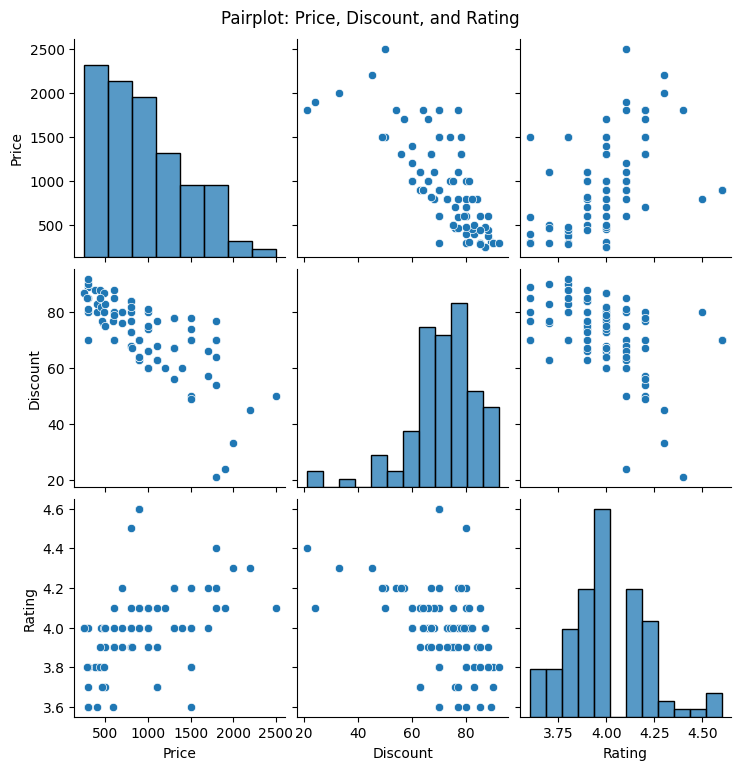

In [29]:
sns.pairplot(df[['Price', 'Discount', 'Rating']])
plt.suptitle('Pairplot: Price, Discount, and Rating', y=1.02)
plt.show()

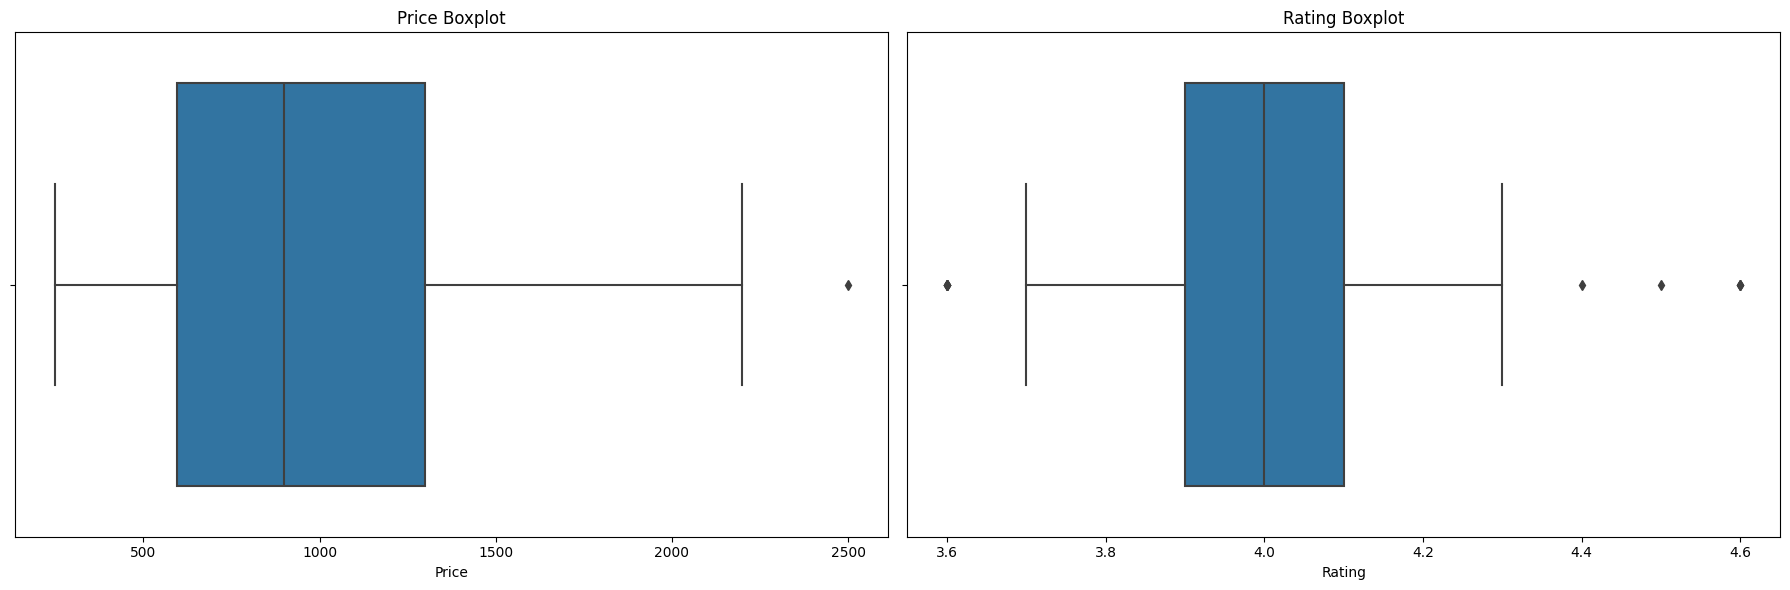

In [30]:

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(x='Price', data=df, ax=axes[0])
axes[0].set_title('Price Boxplot')

sns.boxplot(x='Rating', data=df, ax=axes[1])
axes[1].set_title('Rating Boxplot')

plt.tight_layout()
plt.show()

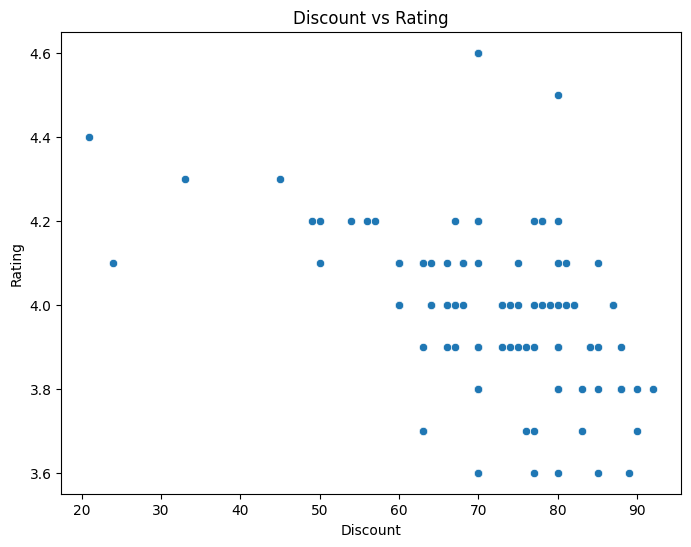

In [32]:
# 3. Scatter plot: Discount vs Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Discount', y='Rating', data=df)
plt.title('Discount vs Rating')
plt.xlabel('Discount')
plt.ylabel('Rating')
plt.show()

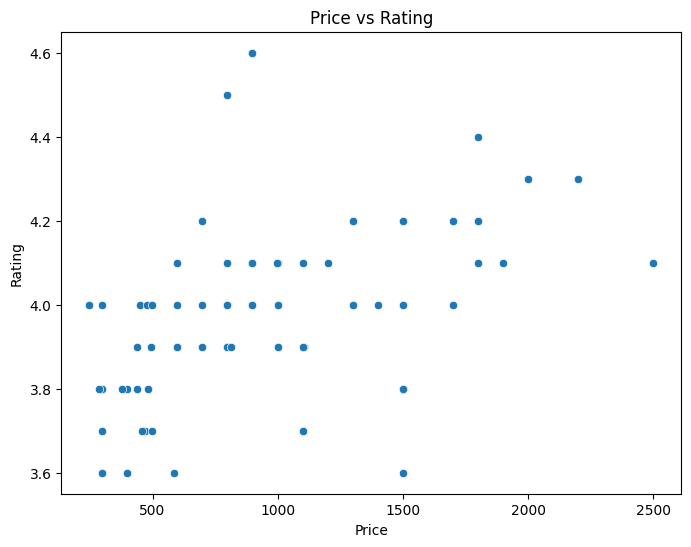

In [33]:

/plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='Rating', data=df)
plt.title('Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()